In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [2]:
df1 = pd.read_csv("Chennai.csv")
df1.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [3]:
df1.shape

(5014, 40)

In [4]:
df2 = df1.drop(df1.columns[[i for i in range(5, 40)]],axis = 1)
df2.head()

,Price,Area,Location,No. of Bedrooms,Resale
0,5500000,1310,Perungalathur,3,0
1,5350000,1126,Madhavaram,2,0
2,8205000,1307,Karapakkam,3,0
3,23400000,3600,Thiruvidandhai,3,0
4,10100000,1700,Iyappanthangal,3,0


In [5]:
df2.isnull().sum()

Price              0
Area               0
Location           0
No. of Bedrooms    0
Resale             0
dtype: int64

In [6]:
df2['BHK'] = df2['No. of Bedrooms'].apply(lambda x: int(x))
df3 = df2.drop(['No. of Bedrooms'], axis='columns')
df3.head()

,Price,Area,Location,Resale,BHK
0,5500000,1310,Perungalathur,0,3
1,5350000,1126,Madhavaram,0,2
2,8205000,1307,Karapakkam,0,3
3,23400000,3600,Thiruvidandhai,0,3
4,10100000,1700,Iyappanthangal,0,3


In [7]:
df4 = df3.copy()
df4['Price_per_sqft'] = df4['Price'] / df4['Area']
df4.head()

,Price,Area,Location,Resale,BHK,Price_per_sqft
0,5500000,1310,Perungalathur,0,3,4198.473282
1,5350000,1126,Madhavaram,0,2,4751.332149
2,8205000,1307,Karapakkam,0,3,6277.735272
3,23400000,3600,Thiruvidandhai,0,3,6500.000000
4,10100000,1700,Iyappanthangal,0,3,5941.176471


In [8]:
len(df4.Location.unique())

185

In [9]:
df4.Location =  df4.Location.apply(lambda x: x.strip())
location_stats = df4.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats

Location
Medavakkam              230
Ambattur                195
Sholinganallur          177
Karapakkam              161
Iyappanthangal          158
                       ... 
GST Road                  1
Egattur                   1
Tharapakkam               1
Thirumudivakkam           1
200 Feet Radial Road      1
Name: Location, Length: 185, dtype: int64

In [10]:
len(location_stats[location_stats < 5])

72

In [11]:
location_below_5 = location_stats[location_stats < 5]
location_below_5

Location
Thiruvidandhai                4
Kil Ayanambakkam              4
Vengambakkam                  4
Thirumazhisai                 4
Ambattur INDUSTRIAL ESTATE    3
                             ..
GST Road                      1
Egattur                       1
Tharapakkam                   1
Thirumudivakkam               1
200 Feet Radial Road          1
Name: Location, Length: 72, dtype: int64

In [12]:
len(df4.Location.unique())

185

In [13]:
df4.Location = df4.Location.apply(lambda x: 'Other' if x in location_below_5 else x)
len(df4.Location.unique())

114

In [14]:
df4.head(10)

,Price,Area,Location,Resale,BHK,Price_per_sqft
0,5500000,1310,Perungalathur,0,3,4198.473282
1,5350000,1126,Madhavaram,0,2,4751.332149
2,8205000,1307,Karapakkam,0,3,6277.735272
3,23400000,3600,Other,0,3,6500.000000
4,10100000,1700,Iyappanthangal,0,3,5941.176471
5,2950000,576,Mevalurkuppam,0,1,5121.527778
6,7600000,1207,Kolapakkam,0,3,6296.603148
7,2234000,604,Kundrathur,0,2,3698.675497
8,5521000,986,Pammal,0,2,5599.391481
9,6321000,1345,Puzhal,0,3,4699.628253


In [15]:
df4.Price_per_sqft.describe()

count      5014.000000
mean       7203.948158
std        8177.703838
min         384.867224
25%        4264.475743
50%        5382.801664
75%        7073.347508
max      277341.389728
Name: Price_per_sqft, dtype: float64

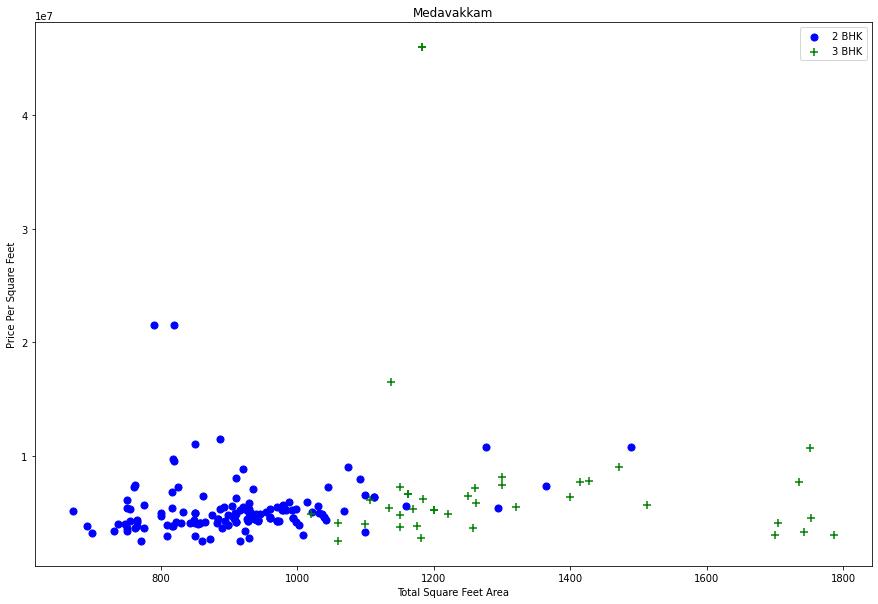

In [16]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.Location == location) & (df.BHK == 2)]
    bhk3 = df[(df.Location == location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.Area, bhk2.Price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.Area, bhk3.Price, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df4, "Medavakkam")

Text(0, 0.5, 'Count')

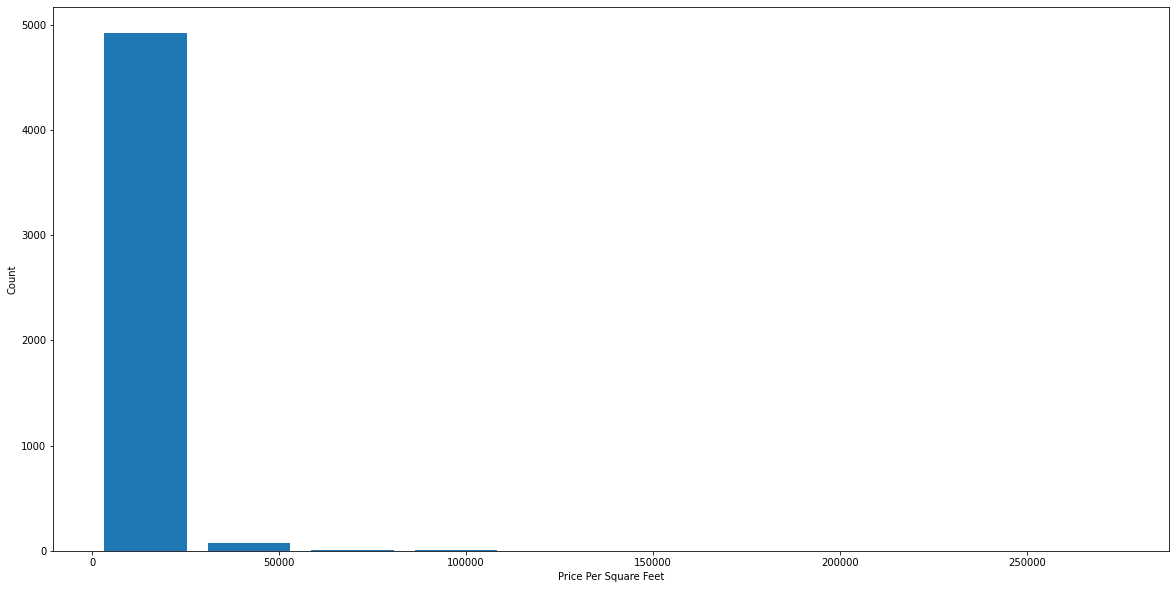

In [17]:
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20, 10);
plt.hist(df4.Price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [18]:
dummies = pd.get_dummies(df4.Location)
dummies.head(3)

,Adambakkam,Adyar,Alwarpet,Ambattur,Aminjikarai,Anakaputhur,Anna Nagar,Annamalai Colony,Annanagar West,Avadi,...,Valasaravakkam,Vanagaram,Vandalur,Velachery,Velappanchavadi,Vellakkal,Vengaivasal,Virugambakkam,West Tambaram,tambaram west
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df5 = pd.concat([df4, dummies.drop('Other', axis = 'columns')], axis = 'columns')
df5.head(3)

,Price,Area,Location,Resale,BHK,Price_per_sqft,Adambakkam,Adyar,Alwarpet,Ambattur,...,Valasaravakkam,Vanagaram,Vandalur,Velachery,Velappanchavadi,Vellakkal,Vengaivasal,Virugambakkam,West Tambaram,tambaram west
0,5500000,1310,Perungalathur,0,3,4198.473282,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,0,2,4751.332149,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,0,3,6277.735272,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df6 = df5.drop(['Location', 'Price_per_sqft'], axis = 'columns')
df6.head(3)

,Price,Area,Resale,BHK,Adambakkam,Adyar,Alwarpet,Ambattur,Aminjikarai,Anakaputhur,...,Valasaravakkam,Vanagaram,Vandalur,Velachery,Velappanchavadi,Vellakkal,Vengaivasal,Virugambakkam,West Tambaram,tambaram west
0,5500000,1310,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8205000,1307,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df6.shape

(5014, 117)

In [22]:
X = df6.drop('Price', axis = 'columns')
X.head()

,Area,Resale,BHK,Adambakkam,Adyar,Alwarpet,Ambattur,Aminjikarai,Anakaputhur,Anna Nagar,...,Valasaravakkam,Vanagaram,Vandalur,Velachery,Velappanchavadi,Vellakkal,Vengaivasal,Virugambakkam,West Tambaram,tambaram west
0,1310,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1126,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1307,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3600,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1700,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
Y = df6.Price
Y.head()

0     5500000
1     5350000
2     8205000
3    23400000
4    10100000
Name: Price, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [25]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_test, Y_test)

0.27286302477104474

In [26]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.35143027, 0.19499134, 0.22255079, 0.19569354, 0.18262686])

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor  

def find_best_model_using_gridsearchcv(X, Y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, Y)

/Users/mohamedinamulhassan/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/mohamedinamulhassan/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavi

,model,best_score,best_params
0,linear_regression,0.229459,{'normalize': False}
1,lasso,0.229468,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,-0.069316,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [28]:
def predict_price(Location, sqft, resale, bhk):
    loc_index = np.where(X.columns == Location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = resale
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]

In [29]:
predict_price('Gopalapuram', 1000, 0, 2)

/Users/mohamedinamulhassan/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


16596664.05192121

In [30]:
import pickle
with open('chennai_housing.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [31]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))